In [12]:
import scipy
import sys
import numpy as np
sys.path.append('/home/clarkmaio/workspace/slurp/')
import matplotlib.pyplot as plt
import autograd
from slurp.src.scipy import l, f, cc, s, GnAM

# Demo splines

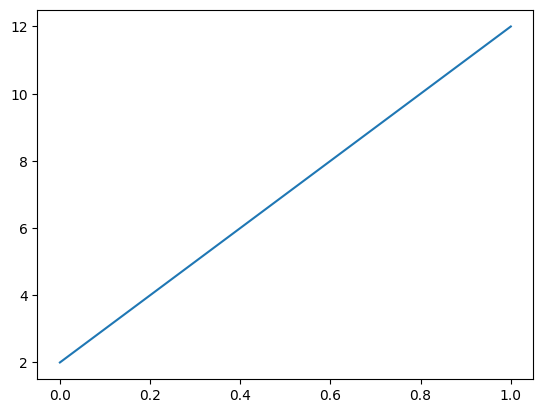

In [13]:
x = np.linspace(0, 1, 100)
spline = l(bias=True)
y = spline(params=[10,2], x=x)

plt.plot(x, y)

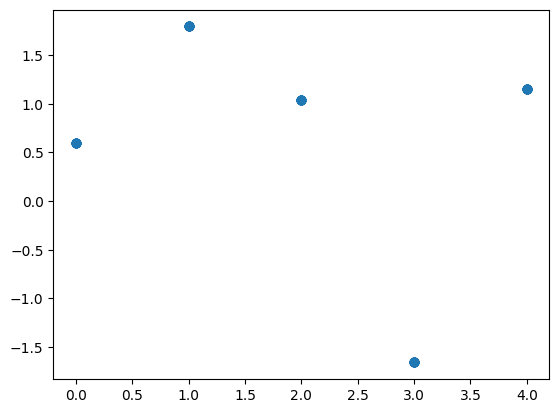

In [14]:
x = np.random.randint(0, 5, 100)
spline = f(n_class=5)
y = spline(params=np.random.randn(5), x=x)

plt.scatter(x, y)

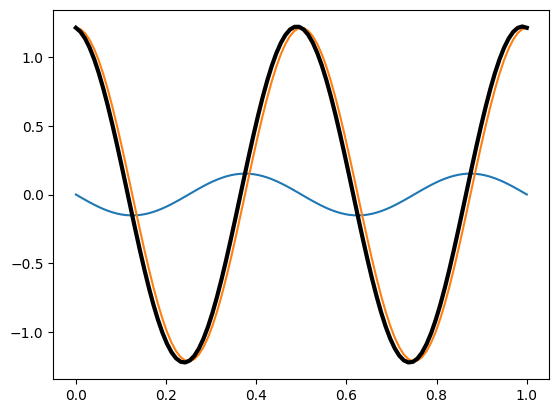

In [15]:
x = np.linspace(0, 1, 100)
order = 1
spline = cc(order=order, period = .5, bias=False)
p = np.random.randn(2*order )
y = spline(params=p, x=x)
yc = spline.components(params=p, x=x)

plt.plot(x, yc)
plt.plot(x, y, color='k', linewidth=3)

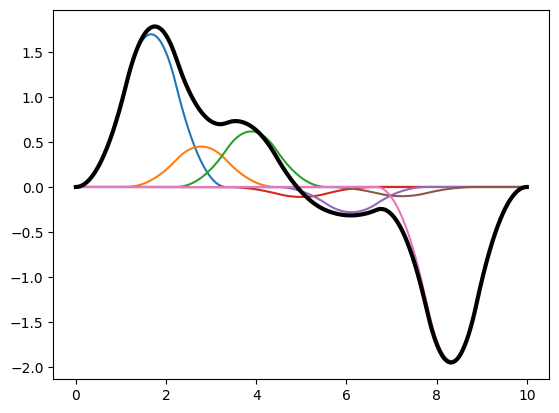

In [16]:
x = np.linspace(0, 10, 1000)
knots, degree = 10, 2
p = np.random.randn(knots-degree-1)
spline = s(knots = np.linspace(0, 10, knots), degree=degree)
yb = spline.basis(x=x, degree = degree)
y = spline(params=p, x=x)


plt.plot(x, spline.components(params=p, x=x))
plt.plot(x, y, color='k', linewidth=3)

In [17]:
fun = lambda x: spline(p, x)
dxfun = autograd.elementwise_grad(fun)
dxdxfun = autograd.elementwise_grad(dxfun)

In [18]:
np.mean(dxdxfun(x)**2)

np.float64(4.729260027178394)

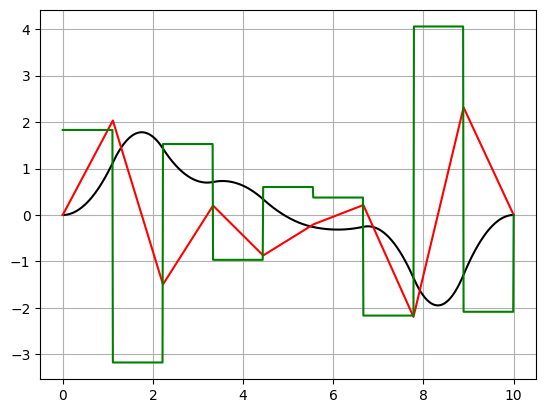

In [19]:
plt.plot(x, y, color='k')
plt.plot(x, dxfun(x), color='r')
plt.plot(x, dxdxfun(x), color='g')
plt.grid()

# Demo GnAM

In [ ]:
xx = np.linspace(0, 10, 1000)
yy = 2*np.sin(xx)*x + np.random.randn(1000)


class mymodel(GnAM):

    def init_splines(self):
        return {
            'cc': cc(order=2, period=2*np.pi),
            'l': l(bias=True),
            's': s(knots=np.linspace(-10, 20, 20), degree=3)
        }

    def design(self, params, *args):
        params_catalog = self.split_params(params)
        
        return (
            self.get_spline('l')(params=params_catalog['l'], x=args[0]) 
            * self.get_spline('cc')(params=params_catalog['cc'], x=args[0]) 
        )
    

mm = mymodel()
mm.fit(yy, xx)
yyhat = mm.predict(xx)

  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
  success: True
   status: 0
      fun: 1.056617123177924
        x: [-2.304e+00  8.893e-04 ... -1.106e+00  1.755e+00]
      nit: 21
      jac: [ 1.820e-06 -6.152e-07 ...  0.000e+00  0.000e+00]
     nfev: 23
     njev: 23
 hess_inv: <22x22 LbfgsInvHessProduct with dtype=float64>


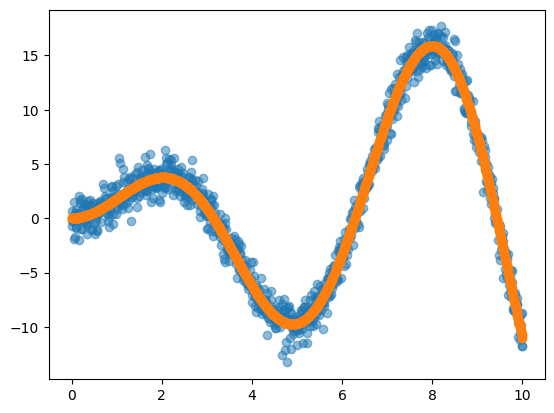

In [32]:
plt.scatter(xx, yy, alpha=.5)
plt.scatter(xx, yyhat)